In [1]:
import pandas as pd

# Load file
file_path = '/Users/cheribeda/Desktop/labeledTrainData.tsv'

# Load the TSV file into a DataFrame
df = pd.read_csv(file_path, sep='\t')

# Display the first few rows of the DataFrame 
df.head(10)

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
5,8196_8,1,I dont know why people think this is such a ba...
6,7166_2,0,"This movie could have been very good, but come..."
7,10633_1,0,I watched this video at a friend's house. I'm ...
8,319_1,0,"A friend of mine bought this film for £1, and ..."
9,8713_10,1,<br /><br />This movie is full of references. ...


In [2]:
from sklearn.model_selection import train_test_split

# Split the DataFrame into features (X) and labels (y)
X = df['review']  
y = df['sentiment']

# Split the data into training and test sets, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets to verify the split
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)



Training set shape: (20000,) (20000,)
Test set shape: (5000,) (5000,)


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Print the shape of the transformed data to verify
print("Shape of X_train_tfidf:", X_train_tfidf.shape)


Shape of X_train_tfidf: (20000, 68308)


Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

You shouldn't fit the TF-IDF vectorizer on the test set because it would involve learning new vocabulary terms from the test set that were not seen during training. This breaks the fundamental principle of machine learning, where the model should not have access to the test data during training to avoid overfitting.

In [4]:
# Transform the test data using the vocabulary and IDF statistics learned from the training data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Print the shape of the transformed test data to verify
print("Shape of X_test_tfidf:", X_test_tfidf.shape)


Shape of X_test_tfidf: (5000, 68308)


In [5]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
logistic_regression = LogisticRegression()

# Train the logistic regression model on the training data
logistic_regression.fit(X_train_tfidf, y_train)


LogisticRegression()

In [9]:
from sklearn.metrics import accuracy_score

# Predict the labels for the test data
y_pred = logistic_regression.predict(X_test_tfidf)

# Calculate the accuracy of the model on the test set
accuracy = accuracy_score(y_test, y_pred)

print("Model accuracy on the test set:", accuracy)


Model accuracy on the test set: 0.8928


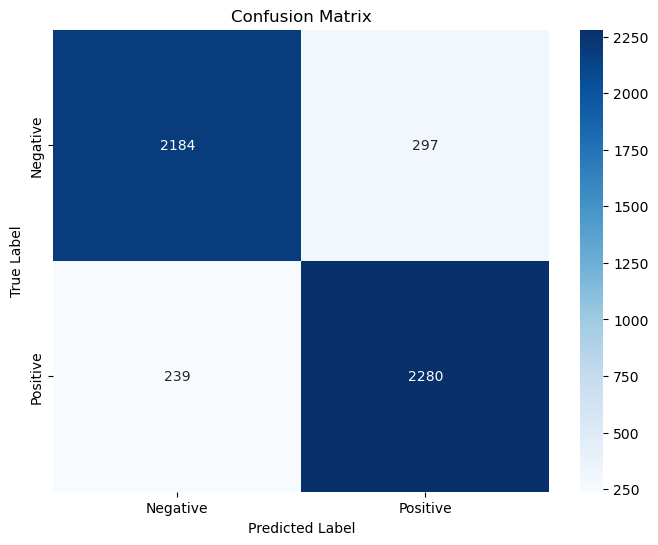

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], 
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [11]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1_score)


Precision: 0.8847497089639115
Recall: 0.9051210797935689
F1-score: 0.8948194662480378


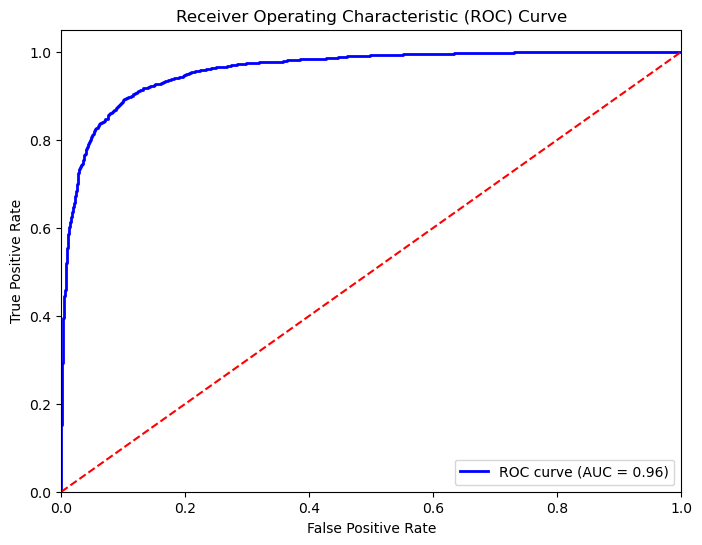

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the probability estimates for the positive class
y_prob = logistic_regression.predict_proba(X_test_tfidf)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [12]:
# Train a logistic regression using the training data.
# Find the model accuracy on test set.

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

# Split features and target variable
X = df['review']
y = df['sentiment']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

# Train logistic regression model
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train_vectorized, y_train)

# Predictions
nb_predictions = nb_classifier.predict(X_test_vectorized)
logreg_predictions = logreg_classifier.predict(X_test_vectorized)

# Evaluate models
nb_accuracy = accuracy_score(y_test, nb_predictions)
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

print("Naive Bayes Accuracy:", nb_accuracy)
print("Logistic Regression Accuracy:", logreg_accuracy)



Naive Bayes Accuracy: 0.8486
Logistic Regression Accuracy: 0.8848


/Users/cheribeda/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


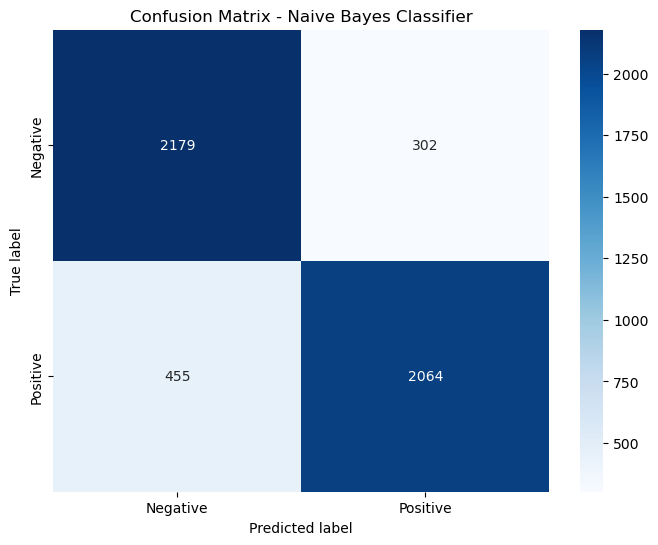

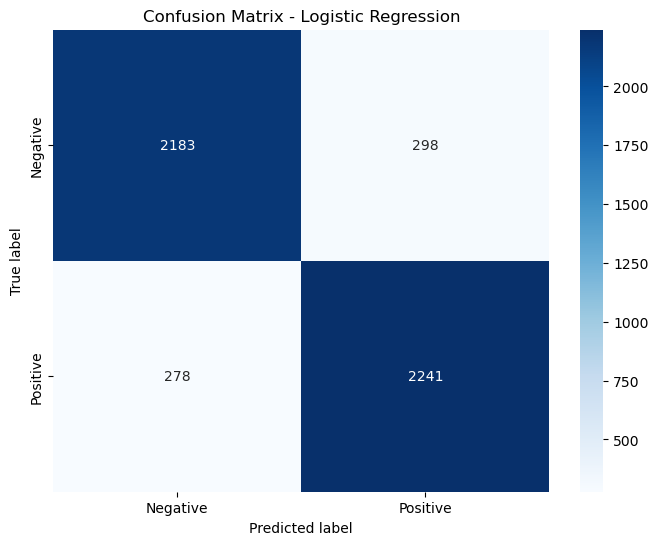

In [13]:
# The code calculates the confusion matrices for both the 
# Naive Bayes classifier and the logistic regression model and plots 
# them using seaborn's heatmap function. T
# The confusion matrix helps visualize the performance of the models by showing the 
# true positive, true negative, false positive, and false negative predictions.


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for Naive Bayes classifier
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)

# Plot confusion matrix for Naive Bayes classifier
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Naive Bayes Classifier")
plt.show()

# Calculate confusion matrix for logistic regression model
logreg_conf_matrix = confusion_matrix(y_test, logreg_predictions)

# Plot confusion matrix for logistic regression model
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [14]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate precision, recall, and F1-score for Naive Bayes classifier
nb_precision, nb_recall, nb_f1_score, _ = precision_recall_fscore_support(y_test, nb_predictions, average='binary')

# Calculate precision, recall, and F1-score for logistic regression model
logreg_precision, logreg_recall, logreg_f1_score, _ = precision_recall_fscore_support(y_test, logreg_predictions, average='binary')

print("Naive Bayes Classifier:")
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-Score:", nb_f1_score)
print("\nLogistic Regression:")
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1-Score:", logreg_f1_score)


Naive Bayes Classifier:
Precision: 0.8723584108199492
Recall: 0.8193727669710202
F1-Score: 0.8450358239508701

Logistic Regression:
Precision: 0.8826309570697125
Recall: 0.8896387455339421
F1-Score: 0.8861209964412813


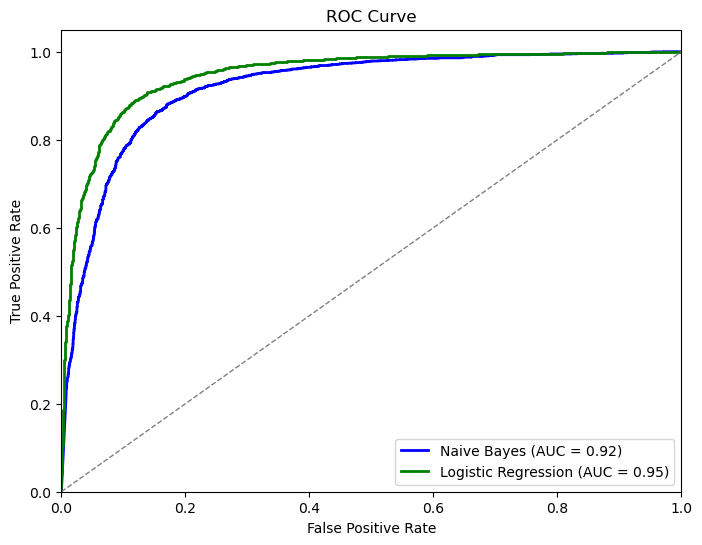

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate probabilities for positive class for both classifiers
nb_probs = nb_classifier.predict_proba(X_test_vectorized)[:, 1]
logreg_probs = logreg_classifier.predict_proba(X_test_vectorized)[:, 1]

# Calculate ROC curve and AUC for Naive Bayes classifier
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = auc(nb_fpr, nb_tpr)

# Calculate ROC curve and AUC for logistic regression model
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
logreg_auc = auc(logreg_fpr, logreg_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(nb_fpr, nb_tpr, color='blue', lw=2, label='Naive Bayes (AUC = %0.2f)' % nb_auc)
plt.plot(logreg_fpr, logreg_tpr, color='green', lw=2, label='Logistic Regression (AUC = %0.2f)' % logreg_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Comparison of Models:

Naive Bayes: Has an AUC (area under curve) of 0.92, which is high and suggests that the model has a good measure of separability and is able to distinguish between positive and negative classes well.

Logistic Regression: Has an AUC (area under curve) of 0.95, which is higher than Naive Bayes, indicating that this model has an even better measure of separability.
